In [1]:
%config Completer.use_jedi = False

In [78]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import dtale
from scipy.spatial import distance_matrix
from ipywidgets import interact, interactive, fixed, interact_manual

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import inconsistent

In [79]:
data = pd.read_csv('D:/Downloads/Country-data.csv')

In [80]:
# d = dtale.show(data)
# d

In [81]:
# l = pd.cut(data['deposit'],3,labels=['barato','medio','caro'])
# fig = plt.figure()
# sns.scatterplot(x=data['property_age'],y=data['unit_area'], hue=l)
# plt.show()

## ¿Podría existir alguna estructura en estos datos?

por ejemplo, hay observaciones con caracterísitcas similares o muy disímiles que se puedan diferenciar claramente?

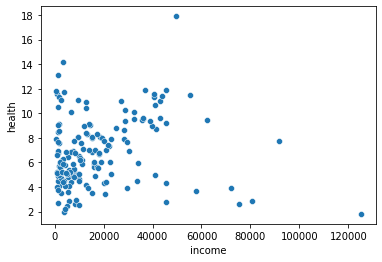

In [82]:
fig = plt.figure()
sns.scatterplot(x=data['income'], y=data['health'])
plt.show()

### Por ejemplo, que tal si hacemos una partición aleatoria por el nivel de ingreso

In [83]:
l = pd.cut(data['income'],3,labels=['Ingreso Bajo','Ingreso Medio','Ingreso Alto'])

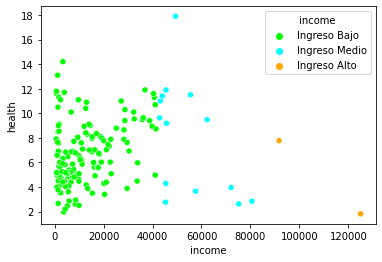

In [84]:
fig = plt.figure()
sns.scatterplot(x=data['income'], y=data['health'],hue=l, palette=['lime','cyan','orange'])
plt.show()

¿Es realmente un buen clustering?, el criterio es aleatorio, puedo ser más preciso en el agrupamiento de mis datos?

***
____

# Clustering
(categorización)

Un cluster es un conjunto de datos homogéneo, el objetivo es:

 + agrupar datos semejantes "cercanos", con caracterísitcas símiles 
 + Organizar estos gupos de manera que cada uno sea lo mas diferente posible.
 
Sin embargo esta definción puede ser ambigüa e incluso contradictoria ya que, la agrupación de datos semejantes no es una relación transitiva, mientras que organizar los grupos es una relación de equivalencia y en particular, transitivia.
 
Por tanto los algoritmos de clustering trabajarán en cálculos de similaridades o desimilaridades

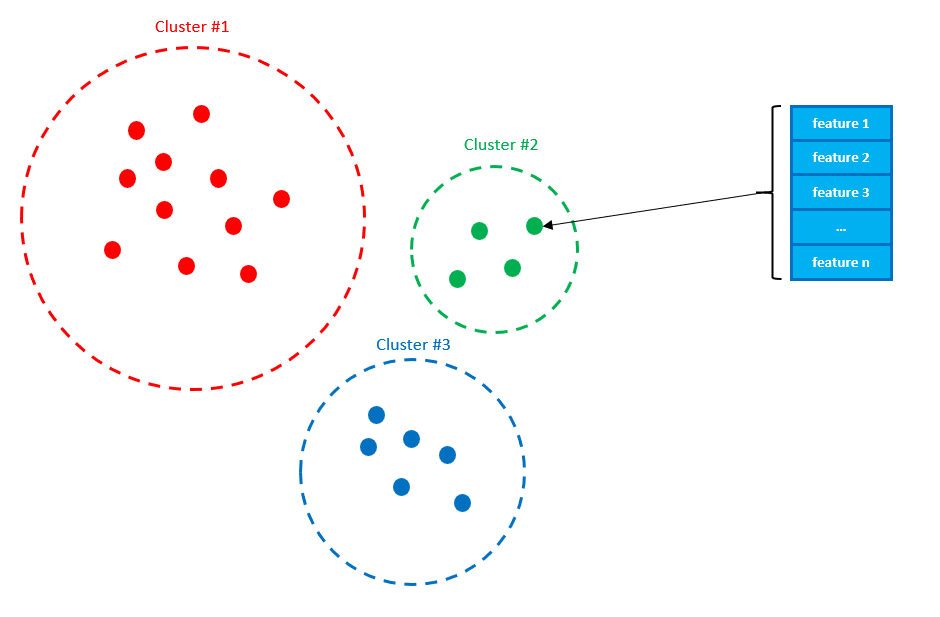

**USOS**

 + Marketing Digital
 + Planificación urbana 
 + Imputar valores desconocidos de un dataset

***
___

## Concepto de Distancia

1. **Distancia de Manhattan**

¿Que tan lejos de encuentras de tus amigos?, ¿que tan lejos estan ellos de sus amigos?

 

<h1><center>$D_{1}(x_{i},x_{j})=\sum_{1}^{n} \ |x_{ik}-x_{jk}|$</center><h1>
    
cuenta el número de calles entre un usuario y otro

2. **Distancia Euclídea**
 
¿ Cuál es el camino más corto entre un punto A y un punto B?

<h1><center>$D_{2}(x_{i},x_{j}) = \sqrt{\sum_{1}^{n} \ (x_{ik}-x_{jk})^{2}}$</center><h1>

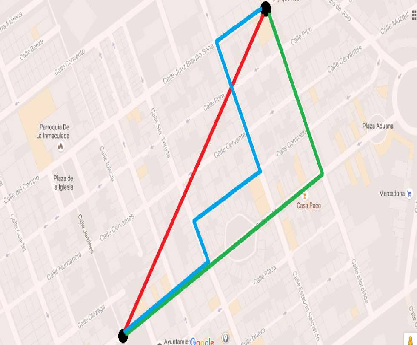

 3. **Distancia de Minkowski**
 
Es una métrica de distancia en un espacio vectorial normado, se considera como una generalización de la distancia euclidiana y la distancia de manhattan

<h1><center>$D_{2}(x_{i},x_{j}) = (\sum_{1}^{n} \ (x_{ik}-x_{jk})^{p})^{1/p}$ ; $1 \leq p$</center></h1>

Cuanto más grande es P menor es la penalización por distancias mayores

si $p<1$ se vila la desigualdad triangular o desigualdad de Minkowski que establece que:
 + **"En todo triángulo la suma de las longitudes de dos lados cualesquiera es siempre mayor a la longitud del lado restante"**.

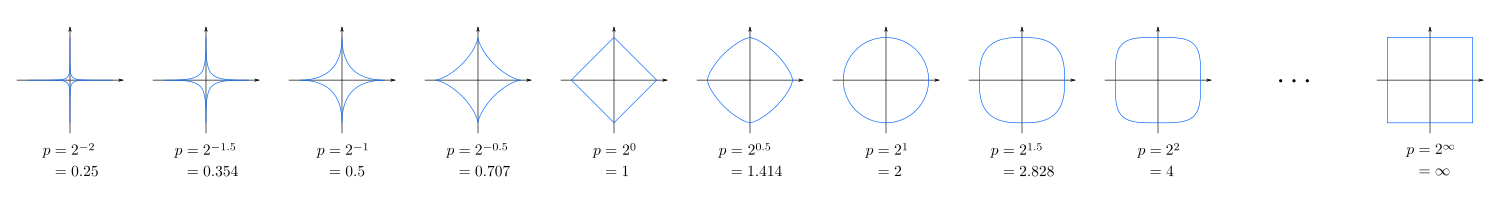

> https://es.wikipedia.org/wiki/Desigualdad_triangular

***
___

In [85]:
X = np.array([data['income'],data['health'], data['exports']]).T
pd.DataFrame(X[:5], columns=['Income','Healt','Exports'],
            index = ['observación '+ str(i) for i in range(0,5,1)])

,Income,Healt,Exports
observación 0,1610.0,7.58,10.0
observación 1,9930.0,6.55,28.0
observación 2,12900.0,4.17,38.4
observación 3,5900.0,2.85,62.3
observación 4,19100.0,6.03,45.5


In [86]:
pd.DataFrame(distance_matrix(X[:5],X[:5],p=10),  columns=['observación '+ str(i) for i in range(0,5,1)],
            index= ['observación '+ str(i) for i in range(0,5,1)])

,observación 0,observación 1,observación 2,observación 3,observación 4
observación 0,0.0,8320.0,11290.0,4290.0,17490.0
observación 1,8320.0,0.0,2970.0,4030.0,9170.0
observación 2,11290.0,2970.0,0.0,7000.0,6200.0
observación 3,4290.0,4030.0,7000.0,0.0,13200.0
observación 4,17490.0,9170.0,6200.0,13200.0,0.0


In [87]:
minmax = MinMaxScaler()
minmax = minmax.fit(X)
X_scaled = minmax.fit_transform(X)

pd.DataFrame(distance_matrix(X_scaled[:5],X_scaled[:5],p=2), columns = ['observación '+ str(i) for i in range(0,5,1)],
            index= ['observación '+ str(i) for i in range(0,5,1)])

,observación 0,observación 1,observación 2,observación 3,observación 4
observación 0,0.000000,0.129153,0.270812,0.395051,0.246151
observación 1,0.129153,0.000000,0.158609,0.288745,0.118927
observación 2,0.270812,0.158609,0.000000,0.155541,0.130802
observación 3,0.395051,0.288745,0.155541,0.000000,0.239553
observación 4,0.246151,0.118927,0.130802,0.239553,0.000000


<IPython.core.display.Javascript object>


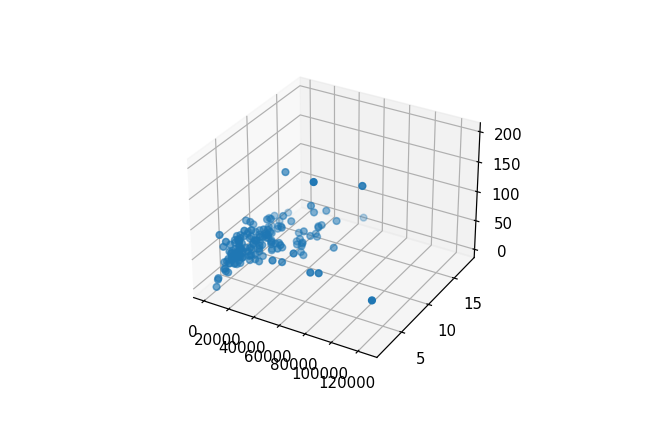

In [88]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(xs=X[:,0],ys=X[:,1],zs=X[:,2])
plt.show()

<IPython.core.display.Javascript object>


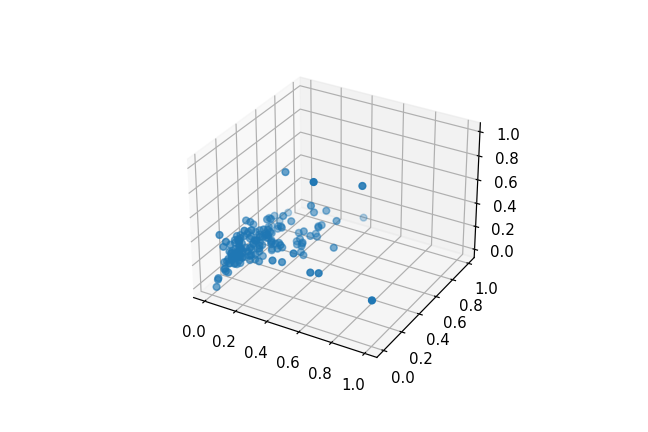

In [89]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(xs=X_scaled[:,0],ys=X_scaled[:,1],zs=X_scaled[:,2])
plt.show()

***
___

<h1><center> Clustering Jerárquico </center></h1>

1. Métodos aglomerativos
2. Métodos disociativos

# Linkadge-Based Clustering
Clustering basado en enlaces

### Enlace simple 
La distancia entre dos ``CLUSTERS`` es el mínimo de las distancias entre cualquier dos puntos del cluster 1 y el cluster 2

$$d(C_{m},C_{n}) = min(d(x_{i},y_{j}) \forall x_{i} \in C_{m},y_{j}\in C_{n}$$

### Enlace completo 
La distancia ente dos ``CLUSTERS`` es el máximo de las distancias entre cualquier dos puntos del cluster 1 y el cluster 2

$$d(C_{m},C_{n}) = max(d(x_{i},y_{j}) \forall x_{i} \in C_{m},y_{j}\in C_{n}$$

### Enlace promedio
La distancia ente dos ``CLUSTERS`` es el promedio de las distancias entre cualquier dos puntos del cluster 1 y el cluster 2

$$d(C_{m},C_{n}) = mean(d(x_{i},y_{j}) \forall x_{i} \in C_{m},y_{j}\in C_{n}$$

### Enlace del Centroide
La distancia entre dos ``CLUSTERS`` es la distancia entre el centroide del cluster 1 y el centroide del cluster 2

$$d(C_{m},C_{n})=d(\bar{C}_{m},\bar{C}_{n})$$

### Enlace de Ward
$$min\sum_{i=1}^{k}\sum_{x_{i}\in C_{i}}(x_{i}-c_{j})^{2}$$

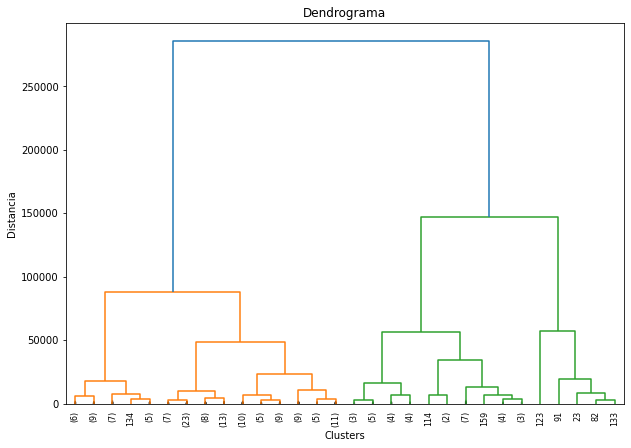

In [90]:
%matplotlib inline
Z = linkage(X,method='ward')
# Que pasa si usamos las variables escaladas?

plt.figure(figsize=(10,7))

dendrogram(Z,leaf_rotation = 90., leaf_font_size = 8.0, show_contracted=True,
          truncate_mode ='lastp', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Distancia')

plt.show()

***
___

> Juan garbiel Gomila. curso completo de machine learning: data science en Python. Udemy